## Navigating the Nasdaq: A Data-Driven Exploration of Tech Sector Dynamics and Investment Opportunities

1. Contribution Checkpoints:

A: Project idea - 5%

B: Dataset Curation and Preprocessing - 10%

C: Data Exploration and Summary Statistics - 10%

D: ML Algorithm Design/Development - 25%

E: ML Algorithm Training and Test Data Analysis - 20%

F: Visualization, Result Analysis, Conclusion - 15%

G: Final Tutorial Report Creation - 10%

H: Additional (not listed above, if any) - 5%


Member 1: Jay Patel, Contribution: 100%

"We, all team members, agree together that the above information is true, and we are confident about our contributions to this submitted project/final tutorial."

Jay Patel, 05/07/2024

2. Member 1: Jay Patel - I did everything by myself(solo).

# Introduction

In an era where technology profoundly influences every aspect of society, understanding the dynamics of tech companies within the stock market is more crucial than ever. This project focuses on the Nasdaq, a stock ETF renowned for its emphasis on technology-oriented stocks, contrasting it with broader market indices like the S&P 500.  More information about the difference between  the S&P 500 and Nasdaq-100 can be found here: The Dow vs. Nasdaq vs. S&P 500: What's the difference?Bankratehttps://www.bankrate.com › investing › the-dow-nasdaq-...

As technology's role and impact expand exponentially, its significance in terms of utility and investment potential also grows. This phenomenon is reflected in the performance comparisons between major stock indices. Specifically, the Nasdaq-100, which predominantly features technology-oriented companies, has consistently outperformed the broader-market S&P 500 ETF, which includes the top 500 companies across all industries. This divergence underscores the pivotal role of technology in contemporary economic growth. The increasing integration of technology into our daily lives and its rapid advancement further solidify the argument for the Nasdaq's superior investment prospects, both short-term and long-term. Supporting this, a study conducted by the Nasdaq over a 15-year period from 2008 to 2023 highlighted a stark contrast in returns: the tech-focused Nasdaq-100 achieved a cumulative total return of 637%, significantly surpassing the 281% return of the S&P 500. These figures not only demonstrate the impressive growth of the tech sector but also position the Nasdaq as a more advantageous investment choice in an increasingly tech-driven world. Here is a visual:
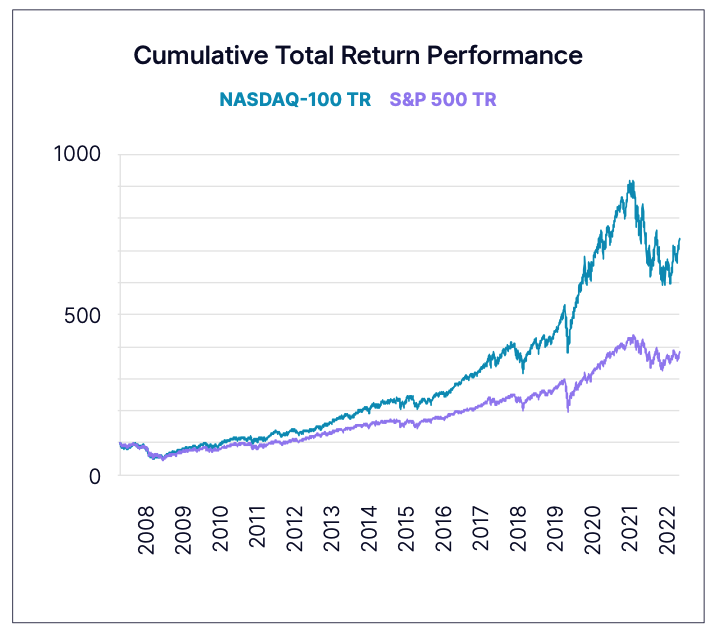

Further information and sourcing can be found here: https://www.nasdaq.com/nasdaq100-vs-sp500-performance

We will conduct an analysis of a dataset encompassing the top 50 tech companies listed on the Nasdaq, detailing attributes such as sub-sector, headquarters state, founding year, annual revenue for 2022-2023, market cap, stock name, annual income tax, and employee size. The next step will be to identify patterns and trends within these leading tech companies. These insights will then be leveraged to assess the broader Nasdaq stock exchange, which hosts over 3,000 tech-related companies, aiming to pinpoint similar, yet lesser-known firms with strong growth potential. This analysis is particularly crucial as we move towards a tech-centric global economy, driven by rapid advancements and widespread adoption in areas such as Artificial Intelligence (AI), Virtual Reality (VR), Blockchain technology, quantum computing, and cybersecurity. Identifying these trends will enable us to discover promising investment opportunities in the burgeoning tech sector.

**Research Questions:**

1. Historical Revenue Trends: Are companies founded before the year 2000 more financially successful than those founded afterward? This question will be explored through a T-test comparing the average revenues of these two groups, providing insights into the impact of establishment era on financial performance.
2. Sector Performance: Does the sub-sector classification (e.g., semiconductors, consumer electronics) influence a company's financial success? An ANOVA test will be employed to investigate if there are statistically significant differences in average annual revenues across various tech sub-sectors.
3. Revenue and Market Cap Correlation: Is there a strong correlation between a company's revenue and its market capitalization? This analysis seeks to establish whether higher revenues are indicative of higher market caps, which could suggest a company's status as a growth stock. A Chi-Squared test will be employed to determine if there's a significant association between annual revenue and market cap, potentially guiding investors in identifying high-growth opportunities within the tech sector.


**Goal & Significance:**

In a world increasingly driven by technological innovation, this study seeks to deepen the understanding of the dynamics within the tech sector, specifically through the lens of financial performance on the Nasdaq. By examining detailed characteristics of the top 50 tech companies—ranging from their founding era and sub-sector classification to their financial metrics like annual revenue and market capitalization—this analysis aims to unearth patterns and insights that reveal the critical factors influencing their success. These insights will not only serve as a valuable resource for investors and analysts looking to pinpoint high-potential investment opportunities but will also offer a strategic perspective on how different variables such as company age, industry sub-sector, and size impact economic viability and growth potential. Furthermore, leveraging the insights derived from our initial analysis, we plan to develop a machine learning model that can effectively distinguish between high-growth and low-growth companies. This model will identify firms with the potential to yield substantial returns, categorizing them based on predictive indicators of growth such as revenue trends, market capitalization, and sector-specific dynamics. By deploying this model, we aim to provide investors and financial analysts with a powerful tool that not only forecasts future growth prospects but also aids in making more informed and strategic investment decisions in the rapidly evolving tech sector.


In [1]:
# Imports
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Data Curation

The primary dataset for this project comprises information on the top 50 technology companies listed on the Nasdaq. This dataset includes vital metrics such as sub-sector classification, headquarters state, founding year, annual revenue for 2022-2023, market capitalization, stock name, annual income tax, and employee size. The purpose of using this dataset is to develop a predictive model that can analyze the dynamics of the tech sector, focusing on various factors that influence financial performance such as company age, sector, and financial metrics.

The source of this dataset is https://www.kaggle.com/datasets/lamiatabassum/top-50-us-tech-companies-2022-2023-dataset, which provides comprehensive and updated financial data essential for conducting high-quality market analysis.

In addition to the top 50 tech companies' dataset, the analysis will extend to the broader Nasdaq, which includes over 3000 companies. This comprehensive dataset will serve as the application ground for the predictive model developed from the top 50 companies' data. By applying the model to a wider array of companies, the project aims to identify similar companies that might not be as prominent but show potential for growth, thereby assisting investors and analysts in discovering lucrative investment opportunities within the rapidly evolving tech market.

This dataset, encompassing the broader Nasdaq listings, is sourced from https://stockanalysis.com/stocks/screener/. This dataset will enable a comparative analysis, enhancing the effectiveness of the findings and extending the model's applicability beyond the top 50 tech firms.

Below is the Top 50 Tech Companies' Dataframe:

In [2]:
top_50_Tech_df = pd.read_csv("Top50Tech.csv")
top_50_Tech_df


,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
0,Apple Inc.,Technology,Consumer Electronics,California,1976,387.53,2.520,AAPL,18.314,164000
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1975,204.09,2.037,MSFT,15.139,221000
2,Alphabet (Google),Technology,Software Infrastructure,California,1998,282.83,1.350,GOOG,11.356,190234
3,Amazon,Technology,Software Application,Washington,1994,513.98,1.030,AMZN,-3.217,1541000
4,NVIDIA Corporation,Technology,Semiconductors,California,1993,26.97,0.653,NVDA,0.189,22473
5,Tesla,Technology,Software Infrastructure,Texas,2003,81.46,0.625,TSLA,1.132,127855
6,Meta Platforms,Technology,Software Infrastructure,California,2004,116.60,0.524,META,5.619,86482
7,Broadcom Inc.,Technology,Semiconductors,California,1961,34.41,0.266,AVGO,0.939,20000
8,Oracle Corporation,Technology,Software Infrastructure,Texas,1977,46.07,0.236,ORCL,0.932,143000
9,Cisco Systems Inc.,Technology,Communication Equipments,California,1984,53.16,0.208,CSCO,2.665,83300


Below is the Nasdaq Stock Excahnge DataFrame:

In [3]:
nasdaq_stocks_df = pd.read_csv("screener-stocks.csv")
nasdaq_stocks_df

,Symbol,Company Name,Market Cap,Stock Price,Industry,Volume,Revenue,Employees,Founded
0,MSFT,Microsoft Corporation,3073557477400,413.54,Software - Infrastructure,16346811,2.365840e+11,221000.0,1975.0
1,AAPL,Apple Inc,2805947649000,181.71,Consumer Electronics,76249821,3.816230e+11,161000.0,1977.0
2,NVDA,NVIDIA Corporation,2303500000000,921.40,Semiconductors,36942636,6.092200e+10,29600.0,1993.0
3,GOOGL,Alphabet Inc.,2089125712023,168.10,Internet Content & Information,21268591,3.181460e+11,182502.0,1998.0
4,GOOG,Alphabet Inc.,2088769047682,169.83,Internet Content & Information,15057181,3.181460e+11,182381.0,1998.0
...,...,...,...,...,...,...,...,...,...
3380,APVO,Aptevo Therapeutics Inc.,747507,1.11,Biotechnology,807301,NaN,40.0,NaN
3381,CETX,"Cemtrex, Inc.",285128,0.27,Software - Infrastructure,1365144,6.427649e+07,328.0,NaN
3382,BDRX,Biodexa Pharmaceuticals Plc,279208,1.11,Biotechnology,308645,4.822780e+05,21.0,2000.0
3383,JFBR,Jeffs' Brands Ltd,263915,0.22,Internet Retail,1657025,1.000800e+07,10.0,2017.0


Below, the sectors/industries are listed of both dataframes

In [4]:
top_50_sectors = top_50_Tech_df["Sector"].unique()
print("Top 50 Sectors:", top_50_sectors)

print()
print()

unique_nasdaq = nasdaq_stocks_df['Industry'].unique()
print("Nasdaq Sectors:", unique_nasdaq)

Top 50 Sectors: ['Consumer Electronics' 'Software Infrastructure' 'Software Application'
 'Semiconductors' 'Communication Equipments' 'IT Services'
 'Computer Hardware' 'Electronic Components']


Nasdaq Sectors: ['Software - Infrastructure' 'Consumer Electronics' 'Semiconductors'
 'Internet Content & Information' 'Internet Retail' 'Auto Manufacturers'
 'Semiconductor Equipment & Materials' 'Discount Stores' 'Entertainment'
 'Beverages - Non-Alcoholic' 'Drug Manufacturers - General'
 'Specialty Chemicals' 'Communication Equipment' 'Telecom Services'
 'Software - Application' 'Medical Instruments & Supplies' 'Conglomerates'
 'Travel Services' 'Biotechnology' 'Staffing & Employment Services'
 'Confectioners' 'Restaurants' 'Financial Data & Stock Exchanges'
 'Specialty Business Services' 'Credit Services' 'Lodging' 'Railroads'
 'REIT - Specialty' 'Electronic Gaming & Multimedia'
 'Utilities - Renewable' 'Specialty Retail'
 'Farm & Heavy Construction Machinery' 'Medical Devices' 'Capital Ma

We ran into a issue!! One dataframe includes information on the top 50 tech companies, while the second dataset encompasses a broader list of 3,000 companies from various fields with a focus on technology. However, we face a challenge: the second dataset categorizes companies by broad sectors, whereas the first is more specific, detailing sub-sectors within the technology field. To address this, we need to refine the second dataset to identify and extract those sectors that are relevant to technology.

We got the sectors/industries but we see that there are many non-tech related industries and also we want the tech industries to fall under categories that is similar to the top 50 tech companies' dataset, so we will create a new dataset of only the tech companies from the nasdaq as there are over 3000 companies but not all are in the tech sector.

In [5]:
industry_mapping = {
    'Computer Software: Programming, Data Processing': 'Software Infrastructure',
    'Computer Software: Prepackaged Software': 'Software Application',
    'EDP Services': 'Software Infrastructure',
    'Semiconductors': 'Semiconductors',
    'Industrial Machinery/Components': 'Semiconductors',
    'Computer Manufacturing': 'Consumer Electronics',
    'Computer peripheral equipment': 'Computer Hardware',
    'Retail: Computer Software & Peripheral Equipment': 'Consumer Electronics',
    'Communication Equipment': 'Communication Equipments',
    'Telecommunications Equipment': 'Communication Equipments',
    'Electronic Components': 'Electronic Components',
    'Internet Content & Information': 'Software Application',
    'Software - Infrastructure': 'Software Infrastructure',
    'Software - Application': 'Software Application',
}

# Create a new column called Sector
nasdaq_stocks_df['Sector'] = nasdaq_stocks_df['Industry'].map(industry_mapping)

tech_companies_df = nasdaq_stocks_df[nasdaq_stocks_df['Sector'].notna()]
tech_companies_df['Sector'].fillna('Software Application', inplace=True)

tech_companies_df

<ipython-input-5-82a3f5579be0>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_companies_df['Sector'].fillna('Software Application', inplace=True)


,Symbol,Company Name,Market Cap,Stock Price,Industry,Volume,Revenue,Employees,Founded,Sector
0,MSFT,Microsoft Corporation,3073557477400,413.54,Software - Infrastructure,16346811,2.365840e+11,221000.0,1975.0,Software Infrastructure
2,NVDA,NVIDIA Corporation,2303500000000,921.40,Semiconductors,36942636,6.092200e+10,29600.0,1993.0,Semiconductors
3,GOOGL,Alphabet Inc.,2089125712023,168.10,Internet Content & Information,21268591,3.181460e+11,182502.0,1998.0,Software Application
4,GOOG,Alphabet Inc.,2088769047682,169.83,Internet Content & Information,15057181,3.181460e+11,182381.0,1998.0,Software Application
6,META,"Meta Platforms, Inc.",1181213245790,465.68,Internet Content & Information,15039623,1.427110e+11,67317.0,2004.0,Software Application
...,...,...,...,...,...,...,...,...,...,...
3354,ASNS,"Actelis Networks, Inc.",1848706,0.61,Communication Equipment,210101,5.606000e+06,43.0,1998.0,Communication Equipments
3358,FRGT,"Freight Technologies, Inc.",1734473,0.71,Software - Application,233388,1.967969e+07,88.0,2015.0,Software Application
3360,SYTA,Siyata Mobile Inc.,1683827,2.75,Communication Equipment,399173,8.233301e+06,23.0,NaN,Communication Equipments
3364,TAOP,Taoping Inc.,1575681,0.97,Software - Infrastructure,36222,3.863564e+07,63.0,1993.0,Software Infrastructure


Next problem is that the Revenue categories are not the same in both data sets as the Top 50 tech companies are measured in billions and in the Tech Nasdaq Companies the Revenue is a large number so I need to figure a way to so both are displayed on the same level. Since most small companies will not be earning in the billions, it would be easier if I convert the Revenue categories of both dataframes to Revenue in millions. Converting the billions into millions will help the model be more accurate later on as most of the small Nasdaq companies don't earn a billion plus so the numbers will toss the model and the statistical test off.

In [6]:
# Renaming and converting revenue in top_50_Tech_df
top_50_Tech_df.rename(columns={'Annual Revenue 2022-2023 (USD in Billions)': 'Annual Revenue 2022-2023 (USD in Millions)'}, inplace=True)
top_50_Tech_df['Annual Revenue 2022-2023 (USD in Millions)'] = top_50_Tech_df['Annual Revenue 2022-2023 (USD in Millions)'].apply(lambda x: x * 1000).round(3)

tech_companies_df.rename(columns={'Revenue': 'Annual Revenue 2022-2023 (USD in Millions)'}, inplace=True)
tech_companies_df['Annual Revenue 2022-2023 (USD in Millions)'] = tech_companies_df['Annual Revenue 2022-2023 (USD in Millions)'].apply(lambda x: x / 1e6 if x > 1e6 else x).round(3)

print(top_50_Tech_df[['Company Name', 'Annual Revenue 2022-2023 (USD in Millions)']].tail())
print(tech_companies_df[['Company Name', 'Annual Revenue 2022-2023 (USD in Millions)']].tail())


               Company Name  Annual Revenue 2022-2023 (USD in Millions)
45          GlobalFoundries                                      8100.0
46           IQVIA Holdings                                     14410.0
47  Marvell Technology Inc.                                      5910.0
48   Dell Technologies Inc.                                    102300.0
49                  HP Inc.                                     59780.0
                    Company Name  Annual Revenue 2022-2023 (USD in Millions)
3354      Actelis Networks, Inc.                                       5.606
3358  Freight Technologies, Inc.                                      19.680
3360          Siyata Mobile Inc.                                       8.233
3364                Taoping Inc.                                      38.636
3381               Cemtrex, Inc.                                      64.276


<ipython-input-6-8271f0744b4d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_companies_df.rename(columns={'Revenue': 'Annual Revenue 2022-2023 (USD in Millions)'}, inplace=True)
<ipython-input-6-8271f0744b4d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_companies_df['Annual Revenue 2022-2023 (USD in Millions)'] = tech_companies_df['Annual Revenue 2022-2023 (USD in Millions)'].apply(lambda x: x / 1e6 if x > 1e6 else x).round(3)


Now our revenues are in line so we can compare on them on the same field now.

Next in the tech_companies_df, teh Employees and Founded columns need to be integers not decimals. Also rename those columns to match the Top 50 tech stock df.

In [7]:
tech_companies_df['Employees'] = tech_companies_df['Employees'].fillna(0).astype(int)
tech_companies_df.rename(columns={'Employees': 'Employee Size'}, inplace=True)

tech_companies_df['Founded'] = tech_companies_df['Founded'].fillna(0).astype(int)
tech_companies_df.rename(columns={'Founded': 'Founding Year'}, inplace=True)


top_50_Tech_df.rename(columns={'Annual Revenue 2022-2023 (USD in Billions)': 'Annual Revenue 2022-2023 (USD in Millions)'}, inplace=True)

tech_companies_df


<ipython-input-7-782185e66960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_companies_df['Employees'] = tech_companies_df['Employees'].fillna(0).astype(int)
<ipython-input-7-782185e66960>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_companies_df.rename(columns={'Employees': 'Employee Size'}, inplace=True)
<ipython-input-7-782185e66960>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,Symbol,Company Name,Market Cap,Stock Price,Industry,Volume,Annual Revenue 2022-2023 (USD in Millions),Employee Size,Founding Year,Sector
0,MSFT,Microsoft Corporation,3073557477400,413.54,Software - Infrastructure,16346811,236584.000,221000,1975,Software Infrastructure
2,NVDA,NVIDIA Corporation,2303500000000,921.40,Semiconductors,36942636,60922.000,29600,1993,Semiconductors
3,GOOGL,Alphabet Inc.,2089125712023,168.10,Internet Content & Information,21268591,318146.000,182502,1998,Software Application
4,GOOG,Alphabet Inc.,2088769047682,169.83,Internet Content & Information,15057181,318146.000,182381,1998,Software Application
6,META,"Meta Platforms, Inc.",1181213245790,465.68,Internet Content & Information,15039623,142711.000,67317,2004,Software Application
...,...,...,...,...,...,...,...,...,...,...
3354,ASNS,"Actelis Networks, Inc.",1848706,0.61,Communication Equipment,210101,5.606,43,1998,Communication Equipments
3358,FRGT,"Freight Technologies, Inc.",1734473,0.71,Software - Application,233388,19.680,88,2015,Software Application
3360,SYTA,Siyata Mobile Inc.,1683827,2.75,Communication Equipment,399173,8.233,23,0,Communication Equipments
3364,TAOP,Taoping Inc.,1575681,0.97,Software - Infrastructure,36222,38.636,63,1993,Software Infrastructure


We also need to match the market cap in both data sets so the model can use it properly as one is in trillions and one is the whole number. To make it easier for the model, we changed it to Market Cap in Billions.

In [8]:
# Convert and rename Market Cap in top_50_Tech_df from trillions to billions
top_50_Tech_df['Market Cap (USD in Billions)'] = top_50_Tech_df['Market Cap (USD in Trillions)'] * 1000
top_50_Tech_df.drop(columns=['Market Cap (USD in Trillions)'], inplace=True)  # Remove old column

# Convert and rename Market Cap in tech_companies_df from large numbers to billions
tech_companies_df['Market Cap (USD in Billions)'] = tech_companies_df['Market Cap'] / 1e9
tech_companies_df.drop(columns=['Market Cap'], inplace=True)  # Remove old column

print(top_50_Tech_df[['Company Name', 'Market Cap (USD in Billions)']].tail())
print(tech_companies_df[['Company Name', 'Market Cap (USD in Billions)']].tail())

               Company Name  Market Cap (USD in Billions)
45          GlobalFoundries                          38.0
46           IQVIA Holdings                          37.0
47  Marvell Technology Inc.                          35.0
48   Dell Technologies Inc.                          28.0
49                  HP Inc.                          28.0
                    Company Name  Market Cap (USD in Billions)
3354      Actelis Networks, Inc.                      0.001849
3358  Freight Technologies, Inc.                      0.001734
3360          Siyata Mobile Inc.                      0.001684
3364                Taoping Inc.                      0.001576
3381               Cemtrex, Inc.                      0.000285


<ipython-input-8-9dfede839383>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_companies_df['Market Cap (USD in Billions)'] = tech_companies_df['Market Cap'] / 1e9
<ipython-input-8-9dfede839383>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_companies_df.drop(columns=['Market Cap'], inplace=True)  # Remove old column


Now all our data is cleaned and ready to be used for our Exploratory Data Analysis(EAD).

# Exploratory Data Analysis(EAD)

Goal is to do our exploratory data analysis on the Top 50 tech companies then build a ML model and test it on the Nasdaq where hopefully we can find future winners! This is because we know the top 50 are winners so using patterns and trends from the top 50 we can make a model that help find other winners.

Also we hope to address our research questions with our EDA!!

**Research Question 1-Historical Revenue Trends:** Are companies founded before the year 2000 more financially successful than those founded afterward?

This question will be explored through a T-test comparing the average revenues of these two groups, providing insights into the impact of establishment era on financial performance.

T-test for Annual Revenue of companies founded before 2000 vs after 2000. Let's invetigate our first observation which is doing a t-test.

Null hypothesis: The average "Annual Revenue" of companies founded after 2000  are the same as the companies founded before 2000.

Alternative hypothesis: The average "Annual Revenue" of companies founded after 2000 is not the same as the companies founded before 2000.

T-test on Top 50 Tech Companies:

T-statistic: 1.8381534451918802
P-value: 0.07225167312605085
We fail to reject the null hypothesis, suggesting significant differences in average annual revenue between these groups.


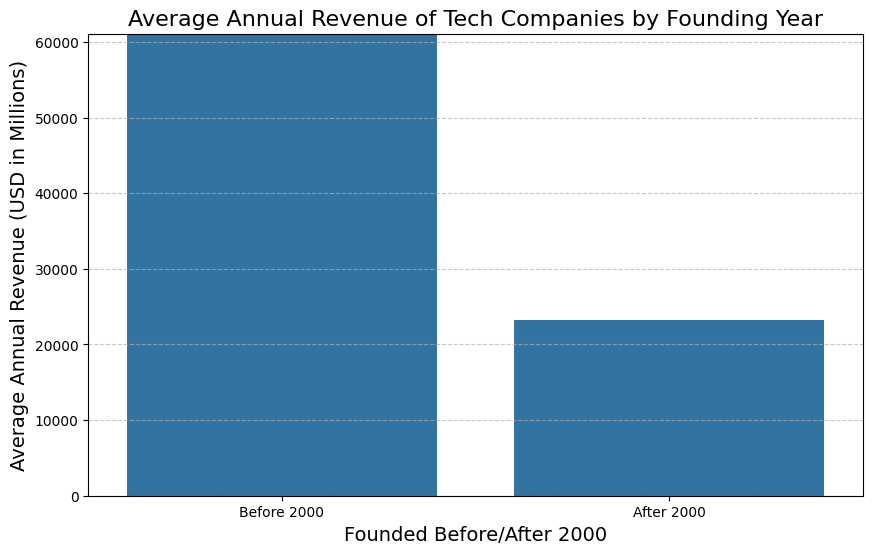

In [9]:
before_2000 = top_50_Tech_df[top_50_Tech_df['Founding Year'] <= 1999]
after_2000 = top_50_Tech_df[top_50_Tech_df['Founding Year'] >= 2000]

t_stat, p_value = ttest_ind(before_2000['Annual Revenue 2022-2023 (USD in Millions)'], after_2000['Annual Revenue 2022-2023 (USD in Millions)'], equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("We reject the null hypothesis, indicating no significant differences in average annual revenue between companies founded before and after 2000.")
else:
    print("We fail to reject the null hypothesis, suggesting significant differences in average annual revenue between these groups.")


top_50_Tech_df['Founded After 2000'] = top_50_Tech_df['Founding Year'] >= 2000
average_revenue = top_50_Tech_df.groupby('Founded After 2000')['Annual Revenue 2022-2023 (USD in Millions)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Founded After 2000', y='Annual Revenue 2022-2023 (USD in Millions)', data=average_revenue)
plt.title('Average Annual Revenue of Tech Companies by Founding Year', fontsize=16)
plt.xlabel('Founded Before/After 2000', fontsize=14)
plt.ylabel('Average Annual Revenue (USD in Millions)', fontsize=14)
plt.xticks([0, 1], ['Before 2000', 'After 2000'])
plt.ylim(0, max(average_revenue['Annual Revenue 2022-2023 (USD in Millions)']) + 50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


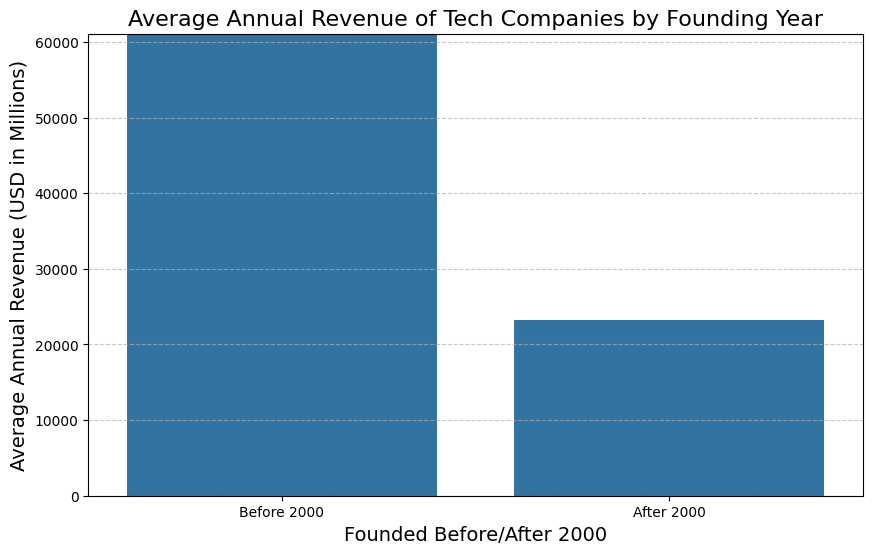

For the top 50 Tech stocks we reject the null hypothesis and accept the alternative which tells us the average "Annual Revenue" of companies founded after 2000 is significantly different than that of companies founded before 2000. This helps show that older companies has significantly higher revenue than those founded after 2000.

**Research Question 2-Sector Performance:** Does the sub-sector classification (e.g., semiconductors, consumer electronics) influence a company's financial success?

An ANOVA test will be employed to investigate if there are statistically significant differences in average annual revenues across various tech sub-sectors.

We want to investigate if the sector is correlated to revenue. To do this we will use an ANOVA test to determine if there's a statistically significant difference in average annual revenue among different sectors. This can possibly tell us that maybe certain sectors have better profit margins.

Null hypothesis: The mean annual revenue is the same across all sectors.

Alternative hypothesis: At least one sector's mean annual revenue is significantly different from the others.


F-Statistic: 2.3636143972891883, P-value: 0.039440146740987135
We reject the null hypothesis. There is a statistically significant difference in the mean annual revenue between sectors.


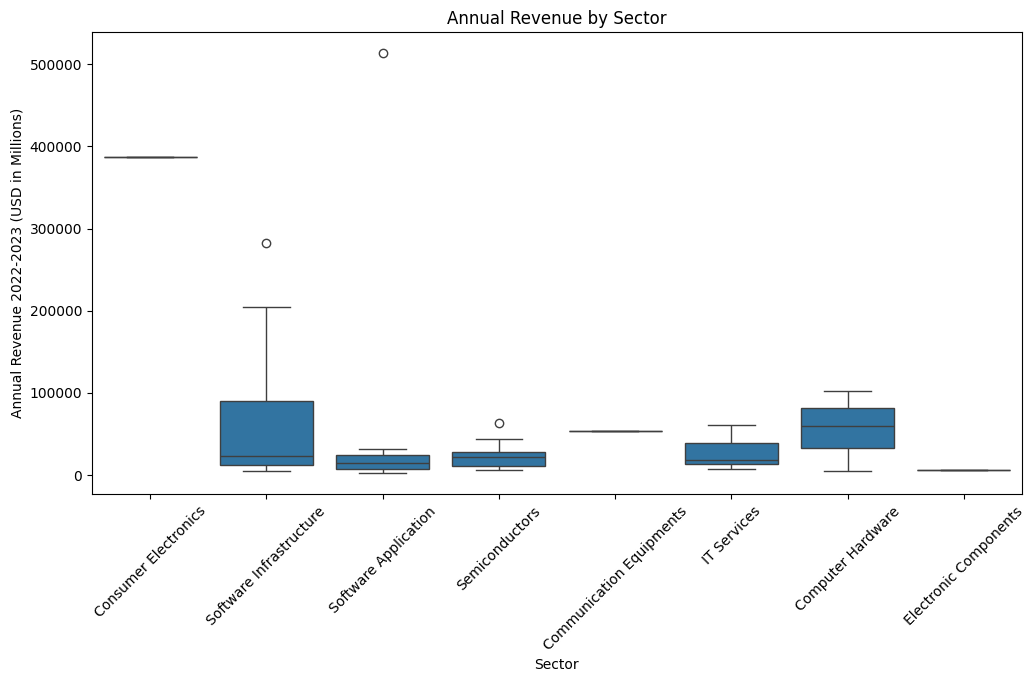

In [10]:
fvalue, pvalue = stats.f_oneway(
    top_50_Tech_df[top_50_Tech_df['Sector'] == 'Consumer Electronics']['Annual Revenue 2022-2023 (USD in Millions)'],
    top_50_Tech_df[top_50_Tech_df['Sector'] == 'Software Infrastructure']['Annual Revenue 2022-2023 (USD in Millions)'],
    top_50_Tech_df[top_50_Tech_df['Sector'] == 'Software Application']['Annual Revenue 2022-2023 (USD in Millions)'],

    top_50_Tech_df[top_50_Tech_df['Sector'] == 'Semiconductors']['Annual Revenue 2022-2023 (USD in Millions)'],
    top_50_Tech_df[top_50_Tech_df['Sector'] == 'Communication Equipments']['Annual Revenue 2022-2023 (USD in Millions)'],
    top_50_Tech_df[top_50_Tech_df['Sector'] == 'IT Services']['Annual Revenue 2022-2023 (USD in Millions)'],

    top_50_Tech_df[top_50_Tech_df['Sector'] == 'Computer Hardware']['Annual Revenue 2022-2023 (USD in Millions)'],
    top_50_Tech_df[top_50_Tech_df['Sector'] == 'Electronic Components']['Annual Revenue 2022-2023 (USD in Millions)']

)
print(f"F-Statistic: {fvalue}, P-value: {pvalue}")

if pvalue < 0.05:
    print("We reject the null hypothesis. There is a statistically significant difference in the mean annual revenue between sectors.")
else:
    print("We fail to reject the null hypothesis. There is no statistically significant difference in the mean annual revenue across sectors.")

plt.figure(figsize=(12, 6))
sns.boxplot(x='Sector', y='Annual Revenue 2022-2023 (USD in Millions)', data=top_50_Tech_df)
plt.xticks(rotation=45)
plt.title('Annual Revenue by Sector')
plt.show()

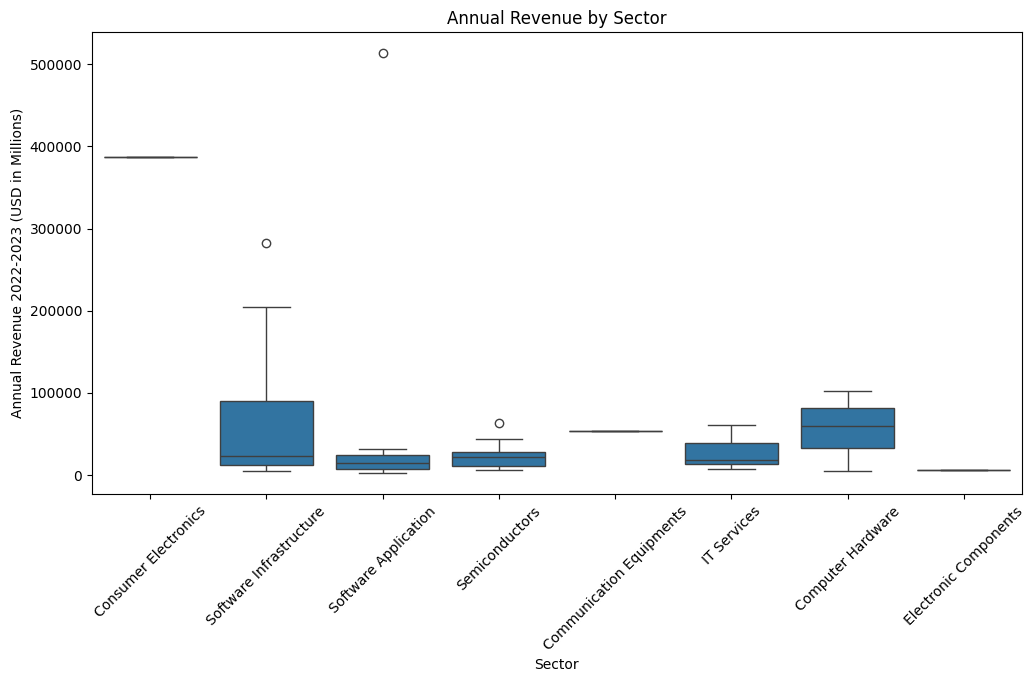

Now, we reject the null hypothesis so we can conclude that there are sectors that have higher revenue then others. Lets conduct a post hoc test since we reject our null hypothesis to find what groups are significantly different than others.

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

results = pairwise_tukeyhsd(endog=top_50_Tech_df['Annual Revenue 2022-2023 (USD in Millions)'],
                                  groups=top_50_Tech_df['Sector'],
                                  alpha=0.05)
print(results)


                        Multiple Comparison of Means - Tukey HSD, FWER=0.05                         
         group1                   group2           meandiff   p-adj     lower        upper    reject
----------------------------------------------------------------------------------------------------
Communication Equipments       Computer Hardware    2326.6667    1.0 -325778.0458 330431.3792  False
Communication Equipments    Consumer Electronics     334370.0 0.1662  -67474.5639 736214.5639  False
Communication Equipments   Electronic Components     -47550.0 0.9999 -449394.5639 354294.5639  False
Communication Equipments             IT Services  -24656.6667    1.0 -352761.3792 303448.0458  False
Communication Equipments          Semiconductors  -29692.1429    1.0 -323812.2473 264427.9616  False
Communication Equipments    Software Application      -5784.0    1.0 -299249.7763 287681.7763  False
Communication Equipments Software Infrastructure   15403.3333    1.0 -280346.2578 311152.92

This tells us that the sector has a impact on Revenue which is a sign of a high growth company. We can conclude that high growth stocks are usually in Consumer Electronics, Software Infrastructure, and Software Application. This shows us that the top category is Consumer Electronics and Electronic Components is the last.

**Research Question 3-Revenue and Market Cap Correlation:** Is there a strong correlation between a company's revenue and its market capitalization?

This analysis seeks to establish whether higher revenues are indicative of higher market caps, which could suggest a company's status as a growth stock. A Chi-Squared test will be employed to determine if there's a significant association between annual revenue and market cap, potentially guiding investors in identifying high-growth opportunities within the tech sector.

Chi-Squared Test to test if there is a relationship between Annual Revenue and Market Cap.

Null hypothesis: There is no association between annual revenue and market cap.

Alternate hypothesis: There is an association between annual revenue and market cap.

Chi-squared statistic: 86.98232323232322
P-value: 1.8901995025699208e-13
We reject the null hypothesis. There is an association between annual revenue and market cap categories.


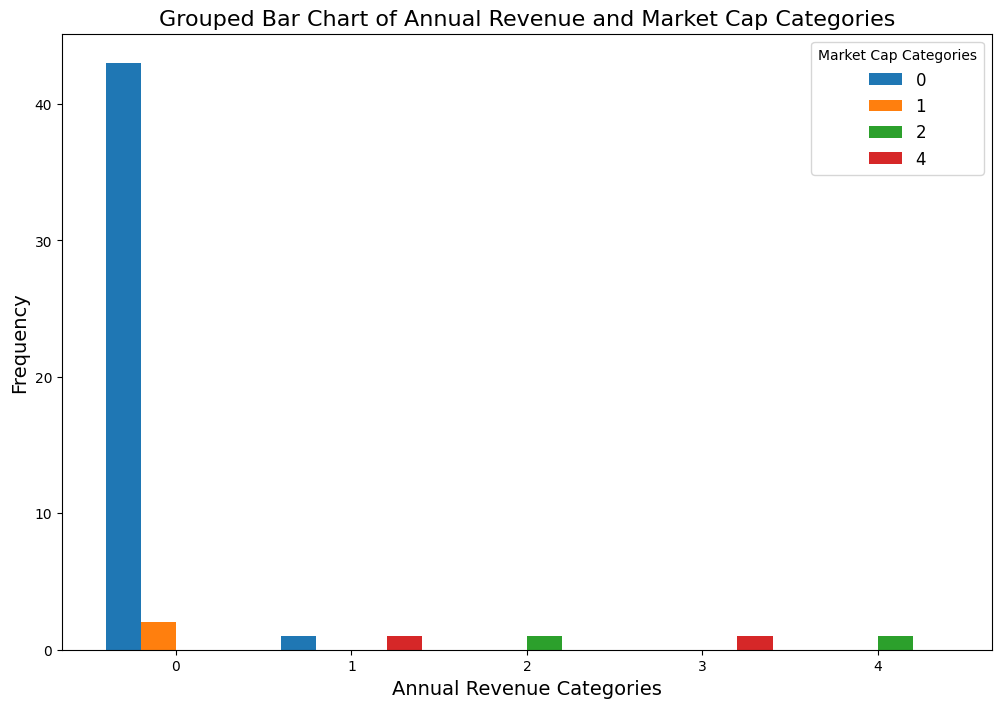

In [12]:
revenue_bins = pd.cut(top_50_Tech_df['Annual Revenue 2022-2023 (USD in Millions)'], bins=5, labels=False)
market_cap_bins = pd.cut(top_50_Tech_df['Market Cap (USD in Billions)'], bins=5, labels=False)

contingency_table = pd.crosstab(revenue_bins, market_cap_bins)
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("We reject the null hypothesis. There is an association between annual revenue and market cap categories.")
else:
    print("We fail to reject the null hypothesis. There is no association between annual revenue and market cap categories.")

contingency_table.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('Grouped Bar Chart of Annual Revenue and Market Cap Categories', fontsize=16)
plt.xlabel('Annual Revenue Categories', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Market Cap Categories', fontsize=12)
plt.xticks(rotation=0)
plt.show()

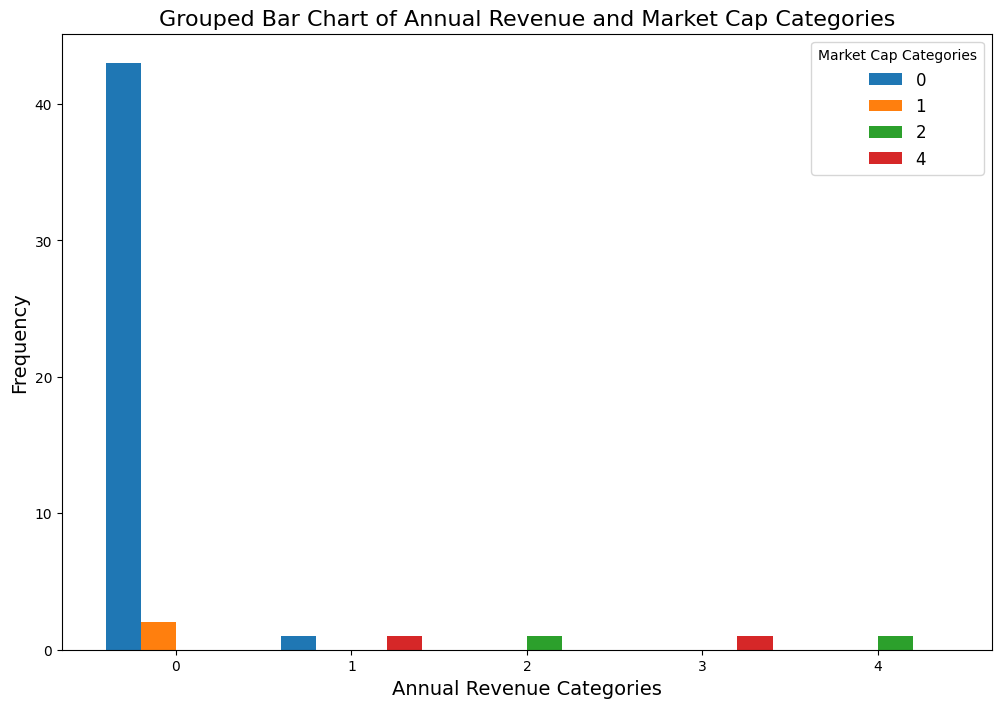

The bars represent the frequency of companies within each combination of annual revenue and market cap category. We can see that majority of the companies fall in the 0 group of annual revenue, with very few in the remaining categories. This indicates a skewed distribution where most companies have a similar level of annual revenue that falls into the first category, and only a few companies have revenue in the higher market cap categories. This shows that the data may be very concentrated which can create a reason to investigate further.

Lets investigate our data to find if there are any outliers that might mess up our analysis later on. To do this we can conduct an Interquartile Range (IQR) Method to find any outliers.

              Company Name    Industry                   Sector    HQ State  \
0               Apple Inc.  Technology     Consumer Electronics  California   
1    Microsoft Corporation  Technology  Software Infrastructure  Washington   
2        Alphabet (Google)  Technology  Software Infrastructure  California   
3                   Amazon  Technology     Software Application  Washington   
6           Meta Platforms  Technology  Software Infrastructure  California   
48  Dell Technologies Inc.  Technology        Computer Hardware       Texas   

    Founding Year  Annual Revenue 2022-2023 (USD in Millions) Stock Name  \
0            1976                                    387530.0       AAPL   
1            1975                                    204090.0       MSFT   
2            1998                                    282830.0       GOOG   
3            1994                                    513980.0       AMZN   
6            2004                                    116600.0     

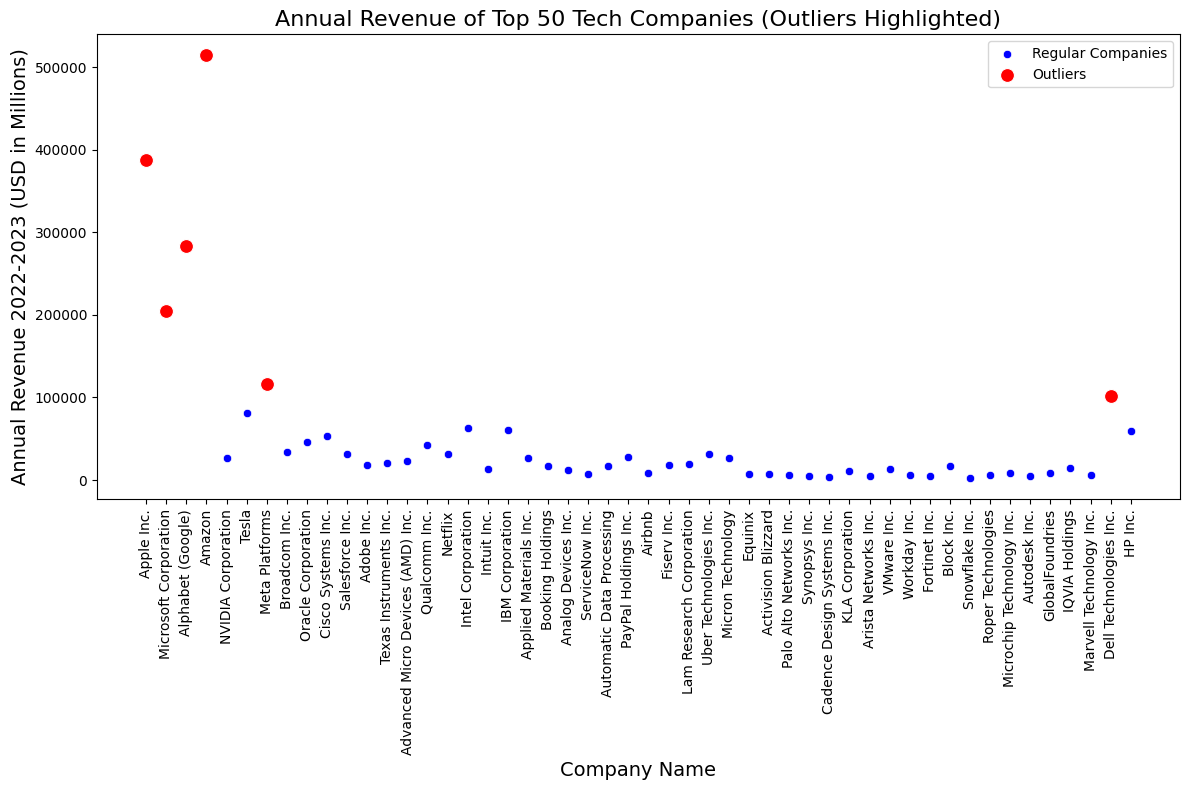

In [13]:
Q1 = top_50_Tech_df['Annual Revenue 2022-2023 (USD in Millions)'].quantile(0.25)
Q3 = top_50_Tech_df['Annual Revenue 2022-2023 (USD in Millions)'].quantile(0.75)
IQR = Q3 - Q1
outliers = top_50_Tech_df[(top_50_Tech_df['Annual Revenue 2022-2023 (USD in Millions)'] < (Q1 - 1.5 * IQR)) | (top_50_Tech_df['Annual Revenue 2022-2023 (USD in Millions)'] > (Q3 + 1.5 * IQR))]
print(outliers)

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Company Name', y='Annual Revenue 2022-2023 (USD in Millions)', data=top_50_Tech_df, color='blue', label='Regular Companies')
sns.scatterplot(x='Company Name', y='Annual Revenue 2022-2023 (USD in Millions)', data=outliers, color='red', label='Outliers', s=100)
plt.xticks(rotation=90)
plt.title('Annual Revenue of Top 50 Tech Companies (Outliers Highlighted)', fontsize=16)
plt.xlabel('Company Name', fontsize=14)
plt.ylabel('Annual Revenue 2022-2023 (USD in Millions)', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

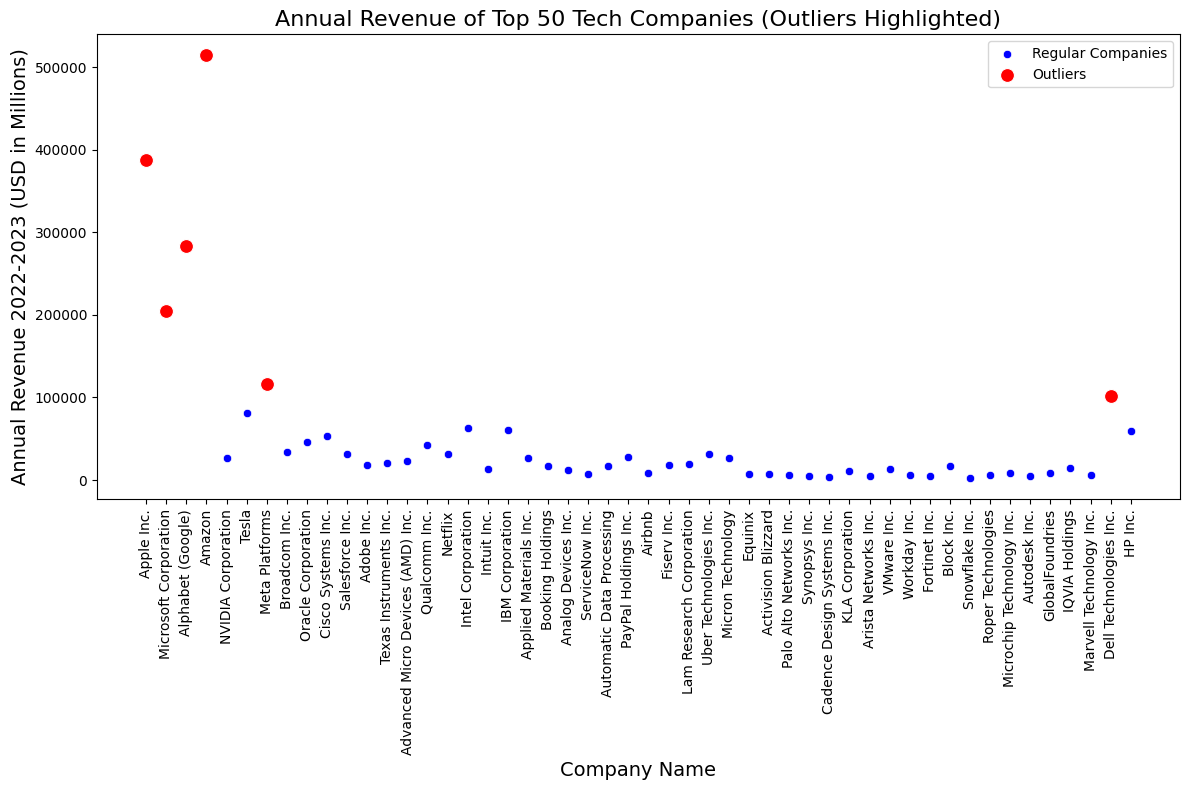

We can see that Apple Inc., Microsoft Corporation, Alphabet (Google), Amazon, Meta Platforms, and Dell Technologies Inc. have been identified as outliers in terms of annual revenue. This indicates that these companies are industry leaders, significantly outperforming their peers in the tech sector. The outliers in the dataset can have a significant impact on statistical analyses, such as calculations of mean and standard deviation. These outliers out perform their peers meaning they may have patterns that can be used to find high growth stocks. We found that the outliers fall under Consumer Electronics, Software Infrastructure, and Software Application which indicates that these sectors are high performing as they have higher revenue, we can use this as a sign for high growth.

Exploratory Data Analysis Conclusion: We conducted various test only on the top 50 as they are the most successful out of the 3000+ stocks in the Nasdaq. The reason we did not run tests on the Nasdaq tech stock is because they would not have provided any trends or patterns as they are vey small companies with very little performance. Remember our goal is to use the top 50 to find the best patterns and trends which we can use to find the next high growth stocks.

# Primary Analysis & Visualization

For my machine learning model, I intend to integrate both Classification and Regression techniques to effectively analyze and predict the growth trajectories of teh Nasdaq companies. Initially I will split companies into two categories: high-growth and low-growth, this classification will be based on certain financial metrics such as historical revenue trends and market capitalization.

Then, I will employ Linear Regression to model the future financial performance of these groups. The regression analysis will aim to forecast key financial outcomes, enabling us to distinguish which group, high-growth or low-growth, presents a better investment profile over the long term. This mix of an approach allows for a refined understanding of potential growth trajectories within the tech sectors.

The methodology will first be applied to the top 50 tech companies to develop and refine the predictive models. Subsequently, the refined models will be tested against a broader dataset of Nasdaq-listed tech stocks to validate their effectiveness and to identify promising investment opportunities among a larger pool of companies. This step will ensure that our findings are more effective and applicable across a diverse set of tech sectors.

In [14]:
median_growth = top_50_Tech_df['Annual Revenue 2022-2023 (USD in Millions)'].median()
top_50_Tech_df['Growth Label'] = (top_50_Tech_df['Annual Revenue 2022-2023 (USD in Millions)'] > median_growth).astype(int)

X = top_50_Tech_df[['Market Cap (USD in Billions)', 'Founding Year']]
y = top_50_Tech_df['Growth Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)

predictions = classifier.predict(X_test_scaled)

print(classification_report(y_test, predictions))



              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.50      0.67         8

    accuracy                           0.73        15
   macro avg       0.82      0.75      0.72        15
weighted avg       0.83      0.73      0.72        15



Analysis of our results:
0 = Low-growth
1 = High-growth

**Precision:**

Class 0 (0.64): This indicates that when the model predicts a company is in the low-growth group, it is correct 64% of the time.

Class 1 (1.00): This indicates that when the model predicts high-growth, it is correct every time.

**Recall:**

Class 0 (1.00): This indicates that the model successfully identifies all actual low-growth cases.

Class 1 (0.50): This indicates that the model correctly identifies only 50% of the actual high-growth cases.

**F1-score:**

Class 0 (0.78): This is the harmonic mean of precision and recall for the  low-growth class. A score of 0.78 indicates a good balance between precision and recall.

Class 1 (0.67): This score for the high-growth class indicates a smaller balance compared to the low-growth class, due to the lower recall rate.

**Overall:** The ratio of correctly predicted instances to the total instances in the dataset is 73%. Basically, the accuracy is 73%.

In [15]:
high_growth_companies = top_50_Tech_df[top_50_Tech_df['Growth Label'] == 1]

X_reg = high_growth_companies[['Market Cap (USD in Billions)', 'Founding Year']]
y_reg = high_growth_companies['Annual Revenue 2022-2023 (USD in Millions)']

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

X_reg_train_scaled = scaler.fit_transform(X_reg_train)
X_reg_test_scaled = scaler.transform(X_reg_test)

regressor = LinearRegression()
regressor.fit(X_reg_train_scaled, y_reg_train)

reg_predictions = regressor.predict(X_reg_test_scaled)

mse = mean_squared_error(y_reg_test, reg_predictions)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 30254755134.03265


This Mean Squared Error is very high but this can possibly be explained due to the the scale of the revenue data being in millions. High values in the target variable can lead to high error values.

Lets visualize the model!

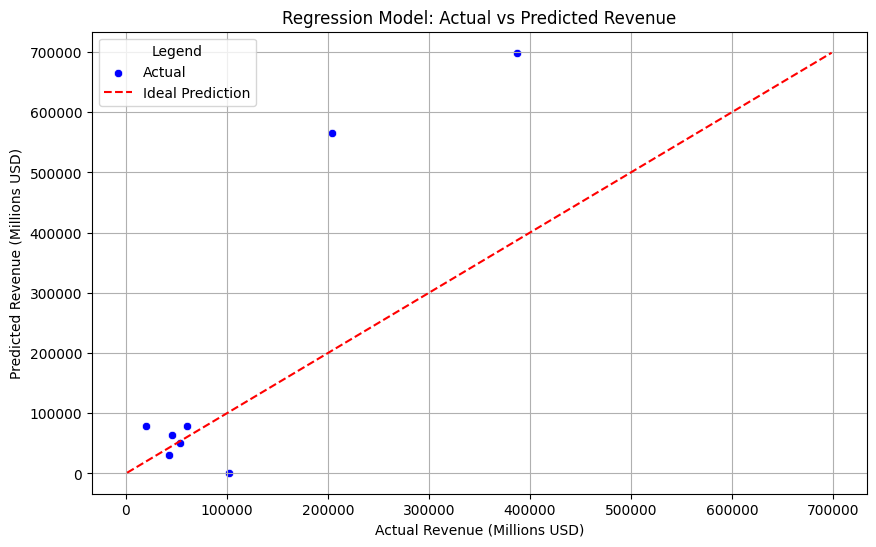

In [16]:
plot_data = pd.DataFrame({
    'Actual Revenue (Millions USD)': y_reg_test,
    'Predicted Revenue (Millions USD)': reg_predictions
})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual Revenue (Millions USD)', y='Predicted Revenue (Millions USD)', data=plot_data, color='blue', label='Actual')

max_value = max(plot_data['Actual Revenue (Millions USD)'].max(), plot_data['Predicted Revenue (Millions USD)'].max())
min_value = min(plot_data['Actual Revenue (Millions USD)'].min(), plot_data['Predicted Revenue (Millions USD)'].min())
plt.plot([min_value, max_value], [min_value, max_value], 'r--', label='Ideal Prediction')

plt.title('Regression Model: Actual vs Predicted Revenue')
plt.xlabel('Actual Revenue (Millions USD)')
plt.ylabel('Predicted Revenue (Millions USD)')
plt.legend(title='Legend')
plt.grid(True)
plt.show()


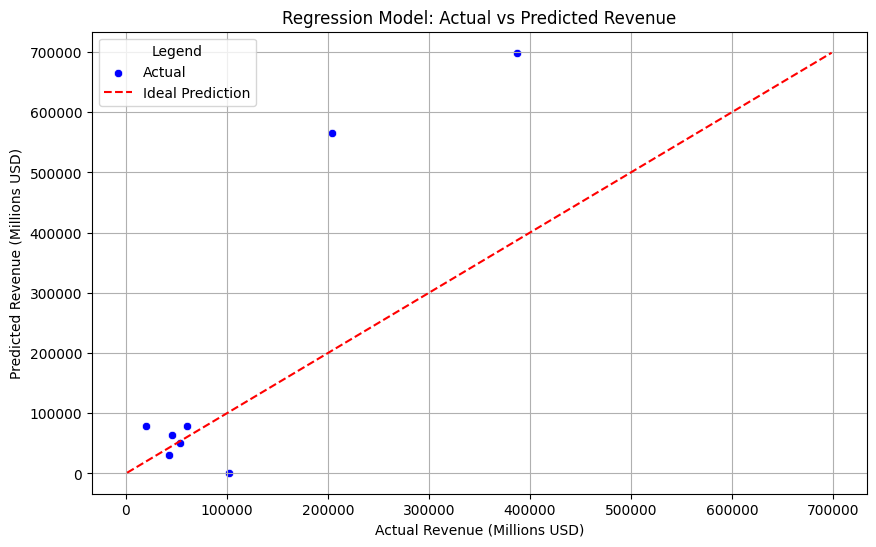

We can that towards the lower part of the line, there many actual values close to the line and as we increase in Revenue there are outliers. This model indicates that it is somewhat close. The discrepancies come from the lack of real time data as some data is not up to date, companies not updating their founding year on the Nasdaq, and some companies may identify as multiple sectors, these are some issues that may throw our model off.

Next lets apply our model to the Nasdaq tech stocks and find some winners!!!!

In [17]:
tech_companies_df = tech_companies_df.dropna(subset=['Market Cap (USD in Billions)', 'Annual Revenue 2022-2023 (USD in Millions)', 'Employee Size'])

median_growth = tech_companies_df['Annual Revenue 2022-2023 (USD in Millions)'].median()
tech_companies_df['Growth Label'] = (tech_companies_df['Annual Revenue 2022-2023 (USD in Millions)'] > median_growth).astype(int)

X = tech_companies_df[['Market Cap (USD in Billions)', 'Annual Revenue 2022-2023 (USD in Millions)', 'Employee Size']]
y = tech_companies_df['Growth Label']

pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

pipeline.fit(X, y)

cross_val_scores = cross_val_score(pipeline, X, y, cv=10, scoring='accuracy')

print("Average Accuracy:", cross_val_scores.mean())
print("Accuracy Standard Deviation:", cross_val_scores.std())

predicted_growth = pipeline.predict(X)

tech_companies_df['Predicted_Growth'] = predicted_growth

high_growth_companies = tech_companies_df[tech_companies_df['Predicted_Growth'] == 1]

print(high_growth_companies['Company Name'])


Average Accuracy: 0.7596135265700481
Accuracy Standard Deviation: 0.09787234547737046
0                     Microsoft Corporation
2                        NVIDIA Corporation
3                             Alphabet Inc.
4                             Alphabet Inc.
6                      Meta Platforms, Inc.
                       ...                 
3031                    Earlyworks Co., Ltd
3119                           Amesite Inc.
3151    Integrated Media Technology Limited
3203                    Asset Entities Inc.
3289                    Versus Systems Inc.
Name: Company Name, Length: 141, dtype: object


<ipython-input-17-3da86f747e42>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_companies_df['Growth Label'] = (tech_companies_df['Annual Revenue 2022-2023 (USD in Millions)'] > median_growth).astype(int)
<ipython-input-17-3da86f747e42>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_companies_df['Predicted_Growth'] = predicted_growth


Above are the Nasdaq Tech companies the model classified as high growth from the classification machine learning model. It also gave us a accuracy of 75.96% which is great for limited information on very small companies with not much information.

Next, we know the top 50 tech stocks are all high growth, and are all in the Nasdaq as well. Lets see how many

In [18]:
high_growth_tech = tech_companies_df[tech_companies_df['Predicted_Growth'] == 1]
top_50_symbols = top_50_Tech_df['Stock Name']
# Find how many of the top 50 tech stocks are classified as high-growth
top_50_high_growth_count = high_growth_tech[high_growth_tech['Symbol'].isin(top_50_symbols)].shape[0]
high_growth_tech[high_growth_tech['Symbol'].isin(top_50_symbols)]
top_50_high_growth_count = high_growth_tech[high_growth_tech['Symbol'].isin(top_50_symbols)].shape[0]

print(f"Number of Top 50 Tech Stocks classified as High Growth: {top_50_high_growth_count}")

Number of Top 50 Tech Stocks classified as High Growth: 24


Our model predicted 24 out of 50 stocks correct which is not bad. To analyze this further lets visualize this with a confusion matrix.

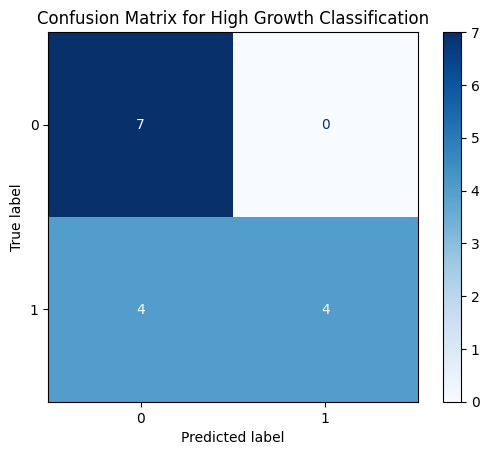

In [19]:
# the confusion matrix
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for High Growth Classification')
plt.show()

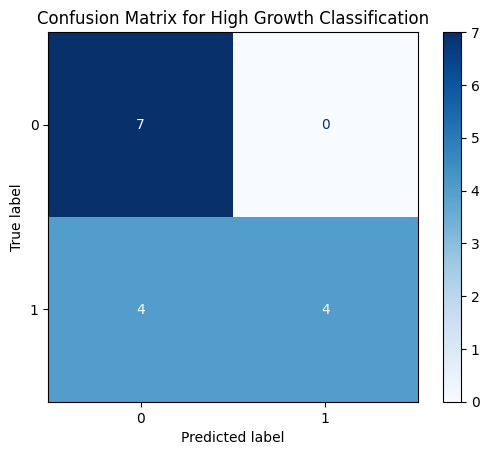

The confusion matrix shows that our classification model correctly identified 7 out of 7 companies as low-growth (True Negatives). However, it correctly identified only 4 out of 8 companies as high-growth (True Positives), with 4 false negatives. There are no false positives, where a low-growth company is incorrectly labeled as high-growth, which is good for avoiding overestimating growth. This suggests that while the model is very reliable at confirming companies that are not high-growth, it's somewhat conservative, potentially missing some high-growth companies. At least we know it can find some potential winners and is also accurate at identifying companies that do not have high growth potential.


In [20]:
tech_companies_df['Growth Label'] = (tech_companies_df['Annual Revenue 2022-2023 (USD in Millions)'] > median_growth).astype(int)
X_nasdaq = tech_companies_df[['Market Cap (USD in Billions)', 'Founding Year']]

X_nasdaq_scaled = scaler.transform(X_nasdaq)

nasdaq_predictions = classifier.predict(X_nasdaq_scaled)
tech_companies_df['Predicted Growth'] = nasdaq_predictions

nasdaq_high_growth_companies = tech_companies_df[tech_companies_df['Predicted Growth'] == 1]

print(nasdaq_high_growth_companies[['Company Name', 'Predicted Growth']])

nasdaq_high_growth_features = tech_companies_df[tech_companies_df['Predicted Growth'] == 1][['Market Cap (USD in Billions)', 'Founding Year']]
nasdaq_high_growth_features_scaled = scaler.transform(nasdaq_high_growth_features)

nasdaq_revenue_predictions = regressor.predict(nasdaq_high_growth_features_scaled)

tech_companies_df.loc[tech_companies_df['Predicted Growth'] == 1, 'Predicted Revenue (USD in Millions)'] = nasdaq_revenue_predictions

print(tech_companies_df[tech_companies_df['Predicted Growth'] == 1][['Company Name', 'Predicted Revenue (USD in Millions)']])


                                Company Name  Predicted Growth
0                      Microsoft Corporation                 1
2                         NVIDIA Corporation                 1
3                              Alphabet Inc.                 1
4                              Alphabet Inc.                 1
6                       Meta Platforms, Inc.                 1
7                              Broadcom Inc.                 1
12              Advanced Micro Devices, Inc.                 1
23            Texas Instruments Incorporated                 1
62                  Roper Technologies, Inc.                 1
103             ON Semiconductor Corporation                 1
160   Telefonaktiebolaget LM Ericsson (publ)                 1
164                           VeriSign, Inc.                 1
240                           Amdocs Limited                 1
265                        Match Group, Inc.                 1
307                       SPS Commerce, Inc.           

<ipython-input-20-ba69d3e89e52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_companies_df['Growth Label'] = (tech_companies_df['Annual Revenue 2022-2023 (USD in Millions)'] > median_growth).astype(int)
<ipython-input-20-ba69d3e89e52>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_companies_df['Predicted Growth'] = nasdaq_predictions
<ipython-input-20-ba69d3e89e52>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

The code above tells us the future revenue of the high growth companies we identified in the Nasdaq by using the linear regression model to predict this. Next

Now lets visualize this!

<ipython-input-26-fd1aa0c54358>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data.rename(columns={'Annual Revenue 2022-2023 (USD in Millions)': 'Actual Revenue'}, inplace=True)


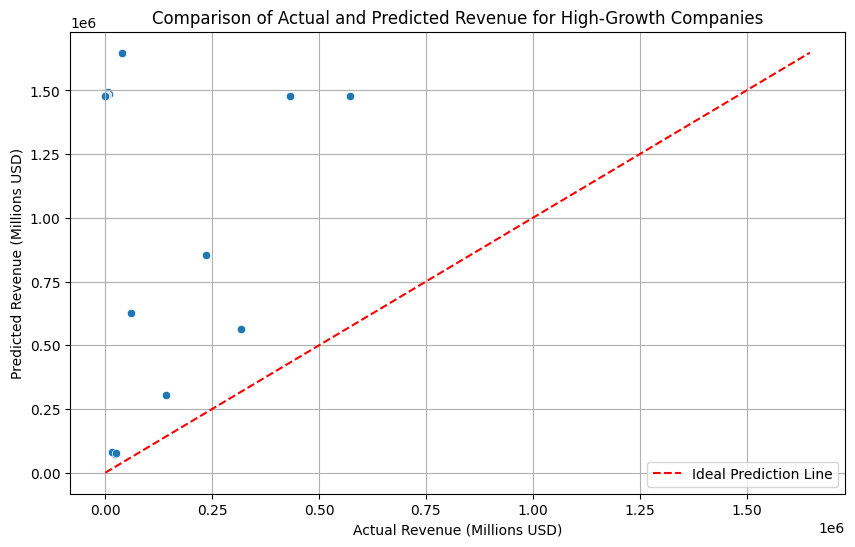

In [26]:
tech_companies_df.loc[tech_companies_df['Predicted Growth'] == 1, 'Predicted Revenue (USD in Millions)'] = nasdaq_revenue_predictions
high_growth_companies = tech_companies_df[tech_companies_df['Predicted Growth'] == 1]
predicted_revenues = tech_companies_df[tech_companies_df['Predicted Growth'] == 1]
tech_companies_df.loc[tech_companies_df['Predicted Growth'] == 1, 'Predicted Revenue (USD in Millions)'] = nasdaq_revenue_predictions
high_growth_companies_with_revenue = tech_companies_df[tech_companies_df['Predicted Growth'] == 1]

plot_data = high_growth_companies_with_revenue[['Annual Revenue 2022-2023 (USD in Millions)', 'Predicted Revenue (USD in Millions)']]
plot_data.rename(columns={'Annual Revenue 2022-2023 (USD in Millions)': 'Actual Revenue'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x='Actual Revenue', y='Predicted Revenue (USD in Millions)', marker='o')
plt.plot([plot_data.min().min(), plot_data.max().max()], [plot_data.min().min(), plot_data.max().max()], 'r--', label='Ideal Prediction Line')

plt.title('Comparison of Actual and Predicted Revenue for High-Growth Companies')
plt.xlabel('Actual Revenue (Millions USD)')
plt.ylabel('Predicted Revenue (Millions USD)')
plt.legend()
plt.grid(True)
plt.show()


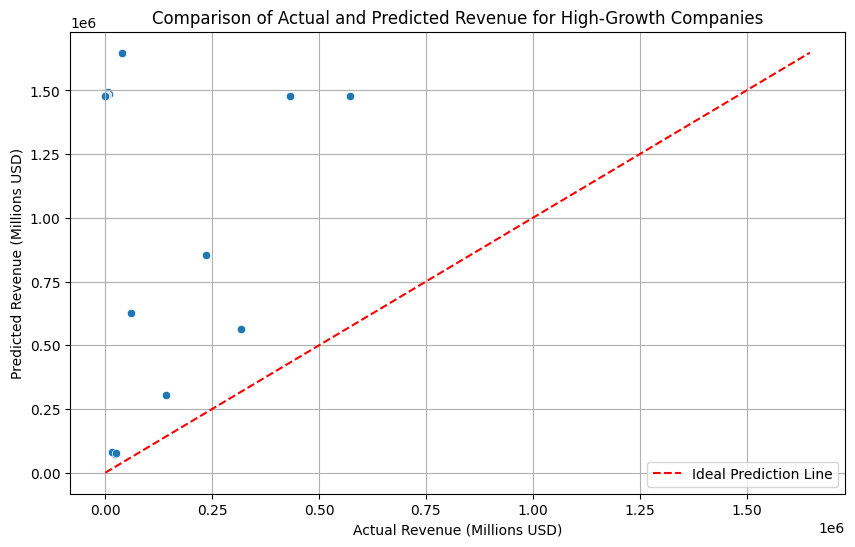
Well, our predictions for the future revenue are far off but we were somewhat close when the high growth stocks revenue is below 0.25 Million USD

# Conclusion


All in all, this project embarked on a comprehensive exploration of the dynamics within the technology sector, specifically examining the performance and growth trajectories of leading tech companies listed on the Nasdaq. By integrating classification and regression models, this analysis aimed to not only segment these companies into high-growth and low-growth categories but also to predict their future financial outcomes based on historical data. Even though our model was not 100% accurate we were semiaccurate and hope to get better with more up to date data.